In [12]:
using LinearAlgebra
using Pkg
Pkg.activate(".")
Pkg.instantiate()




  Activating project at `C:\Users\super\A prediction Bitcoin Price`


In [13]:
#####necesito recoger los puntos"""
d=2; # dimension de los puntos
N=3; # la cantidad d puntos
X=[0 0;0 2;1 0]'  #100*rand(2,N);
Y=[0 0;0 2;-1 0]' #10*rand(2,N); #matriz de puntos objetivo
R=rand(d,d); #rotation matrix


In [14]:
### construit los vectores de media, 
# matriz covarianza y vecotres de varianza
MX=zeros(1,2)
MY=zeros(1,2)

MX=1/N *sum(dims=d, X)';
MY=1/N *sum(dims=d, Y)'; #la media de los puntos
### las varianzas
VarX=1/N * sum(norm(X[:,i]'-MX)^2 for i in 1:N);
VarY=1/N * sum(norm(Y[:,i]'-MY)^2 for i in 1:N);
 using Statistics
CovXY=1/N * cov(Y',X'); #calcula la matriz de cov de X yY

#CovXY= 1/N *sum((Y[:,i]'-MY)*(X[:,i]'-MX)' for i in 1:N)

    

In [30]:
([0,0]+[0,2]+[1,0])/3


2-element Vector{Float64}:
 0.3333333333333333
 0.6666666666666666

In [27]:
MX

1×2 Matrix{Float64}:
 0.333333  0.666667

In [2]:
using Pkg
Pkg.add("Plots")
using Plots


    Updating registry at `C:\Users\super\.julia\registries\General.toml`
   Resolving package versions...
   Installed SpecialFunctions ────────── v1.8.4
   Installed TiledIteration ──────────── v0.3.1
   Installed ImageMetadata ───────────── v0.9.5
   Installed CustomUnitRanges ────────── v1.0.2
   Installed Images ──────────────────── v0.24.1
   Installed ImageMagick ─────────────── v1.2.1
   Installed CatIndices ──────────────── v0.2.2
   Installed ImageFiltering ──────────── v0.6.21
   Installed AxisArrays ──────────────── v0.4.4
   Installed CoordinateTransformations ─ v0.6.2
   Installed ImageTransformations ────── v0.8.13
   Installed ImageMagick_jll ─────────── v6.9.12+2
   Installed ImageShow ───────────────── v0.3.1
   Installed ImageContrastAdjustment ─── v0.3.7
   Installed Ghostscript_jll ─────────── v9.55.0+0
   Installed SimpleTraits ────────────── v0.9.4
   Installed ImageQualityIndexes ─────── v0.2.2
   Installed StringDistances ─────────── v0.11.2
   Installed Quatern

  [189a3867] ↑ Reexport v0.2.0 ⇒ v1.2.2
  [05181044] + RelocatableFolders v0.1.3
  [ae029012] ↑ Requires v1.0.1 ⇒ v1.3.0
  [79098fc4] - Rmath v0.6.1
  [6038ab10] ↑ Rotations v1.0.1 ⇒ v1.2.0
  [6c6a2e73] + Scratch v1.1.0
  [65257c39] ↑ ShaderAbstractions v0.2.2 ⇒ v0.2.7
  [1277b4bf] - ShiftedArrays v1.0.0
  [992d4aef] ↑ Showoff v0.3.1 ⇒ v0.3.2
  [699a6c99] ↑ SimpleTraits v0.9.2 ⇒ v0.9.4
  [a2af1166] ↑ SortingAlgorithms v0.3.1 ⇒ v1.0.1
  [276daf66] ↑ SpecialFunctions v0.10.3 ⇒ v1.8.4
  [cae243ae] + StackViews v0.1.1
  [aedffcd0] + Static v0.5.6
  [90137ffa] ↑ StaticArrays v0.12.4 ⇒ v0.12.5
  [82ae8749] + StatsAPI v1.2.1
  [2913bbd2] ↑ StatsBase v0.33.0 ⇒ v0.33.16
  [4c63d2b9] - StatsFuns v0.9.5
  [65254759] - StatsMakie v0.2.3
  [3eaba693] - StatsModels v0.6.11
  [88034a9c] ↑ StringDistances v0.6.5 ⇒ v0.11.2
  [09ab397b] ↓ StructArrays v0.4.4 ⇒ v0.4.2
  [3783bdb8] ↑ TableTraits v1.0.0 ⇒ v1.0.1
  [bd369af6] ↑ Tables v1.0.4 ⇒ v1.7.0
  [5e47fb64] ↑ TestImages v1.1.0 ⇒ v1.6.2
  [06e1c1a7] ↑ 

  ✓ Qt5Svg_jll
  ✓ Qt5Declarative_jll
  ✓ libass_jll
  ✓ FFMPEG_jll
  ✓ FreeTypeAbstraction
  ✓ ColorSchemes
  ✓ FFMPEG
  ✓ ImageCore
  ✓ jlqml_jll
  ✓ GR_jll
  ✓ ImageShow
  ✓ ImageMorphology
  ✓ ImageAxes
  ✓ ImageMagick
  ✓ ImageTransformations
  ✓ PlotUtils
  ✓ PNGFiles
  ✓ ImageDistances
  ✓ GR
  ✓ ImageMetadata
  ✓ QML
  ✓ ImageIO
  ✓ RecipesPipeline
  ✓ ImageContrastAdjustment
  ✓ ImageFiltering
  ✓ AbstractPlotting
  ✓ PlotThemes
  ✓ ImageQualityIndexes
  ✓ Images
  ✓ GLMakie
  ✓ Makie
  ✓ Plots
  70 dependencies successfully precompiled in 298 seconds (138 already precompiled)
  3 dependencies errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the packages
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


LoadError: UndefVarError: X not defined

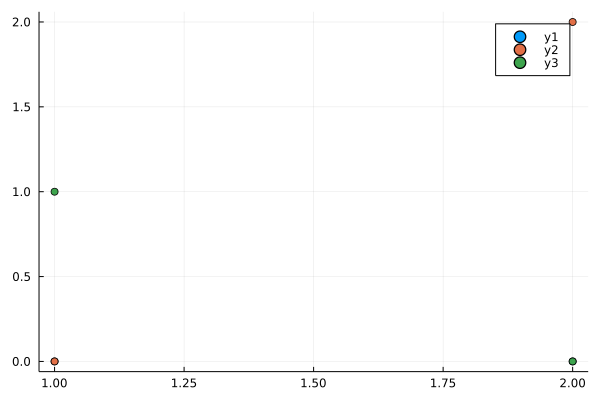

In [8]:
scatter(X)

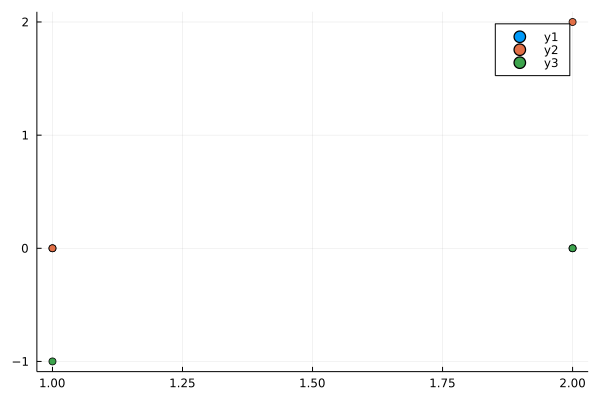

In [9]:
scatter(Y)

In [31]:
####descomposicion SVD###
F=svd(CovXY)
u, s, v =F;
D=diagm(0 => s); # pasar el vector de valroes singulares a la diagonal principal

##construir la matriz de rotacion
if det(u)*det(v')==1
 
    RR=u*v';
    print("eldeterminante de UV' es 1 y la matriz de Rotacion es R=$RR")
else 
        

    pseudoI= Vector{Int64}(ones(d-1)) 
    push!(pseudoI,-1)
    S=diagm(0 => pseudoI)
    RR=u*S*v';
    print("eldeterminante de UV' es -1 y la matriz de Rotacion es \n R=$RR")
end

###calculemos c, y t


c=1/VarX * tr(D*S);

t= MY'-c.*RR* MX' #calulando la transformación
print( "\n La transdormación T = $t\n c=$c")
    


eldeterminante de UV' es -1 y la matriz de Rotacion es 
 R=[0.8320502943378436 0.554700196225229; -0.5547001962252289 0.8320502943378436]
 La transdormación T = [-0.5666666666666667; 0.5333333333333333;;]
 c=0.36055512754639896

$\epsilon^2 = \sigma_y^2-\frac{tr(DS)^2}{\sigma_x^2}$

In [32]:
#Claculo del error
error_cuadratico= VarY-  (tr(D*S)^2)/VarX

0.9666666666666667

In [67]:
####como graficoo estooo###
YT=zeros(d,N)
for i in 1:N
     YT[:,i]= RR*X[:,i] + t # Aplicando los movimientos al conjunto de puntos
end





In [77]:
using Pkg
Pkg.add("StatsPlots")
Pkg.add("RDatasets")
using StatsPlots, RDatasets


   Resolving package versions...
  No Changes to `C:\Users\super\A prediction Bitcoin Price\Project.toml`
  No Changes to `C:\Users\super\A prediction Bitcoin Price\Manifest.toml`
   Resolving package versions...
   Installed Mocking ─────────── v0.7.3
   Installed RData ───────────── v0.8.3
   Installed TimeZones ───────── v1.7.2
   Installed CategoricalArrays ─ v0.10.5
   Installed RDatasets ───────── v0.7.7
    Updating `C:\Users\super\A prediction Bitcoin Price\Project.toml`
  [ce6b1742] + RDatasets v0.7.7
    Updating `C:\Users\super\A prediction Bitcoin Price\Manifest.toml`
  [336ed68f] + CSV v0.10.3
  [324d7699] + CategoricalArrays v0.10.5
  [944b1d66] + CodecZlib v0.7.0
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.3.2
  [e2ba6199] + ExprTools v0.1.8
  [48062228] + FilePathsBase v0.9.18
  [842dd82b] + InlineStrings v1.1.2
  [41ab1584] + InvertedIndices v1.1.0
  [78c3b35d] + Mocking v0.7.3
  [2dfb63ee] + PooledArrays v1.4.1
  [08abe8d2] + PrettyTables v1.3.1
  [df47

LoadError: Failed to precompile RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b] to C:\Users\super\.julia\compiled\v1.7\RDatasets\jl_46CD.tmp.

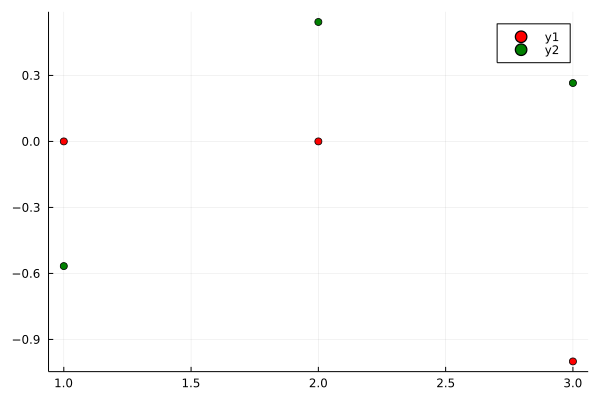

In [96]:
###graficando ando


scatter(Y[1,:], color="red") #Puntos objetivo"
scatter!(YT[1,:], color="green") #puntos transformados


In [97]:
YT

2×3 Matrix{Float64}:
 -0.566667  0.542734   0.265384
  0.533333  2.19743   -0.0213669

In [98]:
Y

2×3 adjoint(::Matrix{Int64}) with eltype Int64:
 0  0  -1
 0  2   0